# Titanic Project - inspired by Ken Jee and Saad Muhammad¶

Ken's accompanying video is located here: https://www.youtube.com/watch?v=I3FBJdiExcg

Best results : 78.947 % accuracy, which was an improvement on an initial score of 77.511%.

**Overview**
1) Understand the shape of the data (Histograms, box plots, etc.)  
2) Data Cleaning  
3) Data Exploration  
4) Feature Engineering  
5) Data Preprocessing for Model  
6) Basic Model Building  
7) Model Tuning  
8) Ensemble Modle Building  
9) Results  

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Here are several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline 
# Sets the backend of matplotlib to 'inline' backend.
from matplotlib import pyplot as plt # plotting
from matplotlib import style # prepackaged plotting styles

import seaborn as sns #prettier and potentially more informative plotting than matplotlib

import string
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [26]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gs = pd.read_csv('../input/titanic/gender_submission.csv')

Ken Jee had a nice idea of outlining the steps to take in the analysis, which I provide in the commented out code below for this workbook.

In [27]:
# Understand nature of the data .info() .describe()
# Check for missing/null data
# Get value counts for categorical variables
# Data visualization using histograms, bar charts, and box plots 
# Correlation between the metrics 
# Explore interesting themes 
    # Ladies and children better survival? 
    # Very young and elderly better survival?
    # Was having a family advantageous?
    # Was an expensive ticket - i.e. Pclass and Fare -  an indicator of better survival odds?
    
# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?
# Model Baseline 
# Model comparison with CV 

In [28]:
#Discover the column names, non-null counts, and data types for each variable in the training data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 entries, with some null values in the Age, Cabin, and Embarked columns.  
**Age:** 177 nulls  
**Cabin:** 687 nulls  
**Embarked:** 2 nulls  
  
**Integer:** PassengerID, Survived, Pclass, SibSp, Parch  
**Float:** Age, Fare  
**Object:** Name, Sex, Ticket, Cabin, Embarked

It might be useful to convert Age to integer, as all ages are entered as whole numbers. Additionally, we might be able to make intelligent guesses about passenger ages and where they embarked from to address the null values.

Cabin has many null values, which might be informative in itself. We could create a category for the null cabin passengers. Maybe not having a cabin contributes to the likelihood of survival.

In [29]:
#Examine the first few rows of training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#Discover the column names, non-null counts, and data types for each variable in the training data set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are 418 records in the test dataframe, with null values in Age (86), Fare (1), and Cabin (327).

In [31]:
#Examine the first few rows of test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The test data doesn't show whether the passenger survived or not. This information is in the gender_submission.csv file.

In [32]:
#Examine the training dataset numeric and categorical variables
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Bishop, Mrs. Dickinson H (Helen Walton)",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Visualize the data

First, let's examine the relationship between Sex and Survived. Our hypothesis is that women and children were more likely to survive than men, but was this true?

# What percentage of women and men survived overall?

In [33]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100
print("% of women who survived:", round(rate_women, 2), "%")

men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)*100
print("% of men who survived:", round(rate_men, 2), "%")

% of women who survived: 74.2 %
% of men who survived: 18.89 %


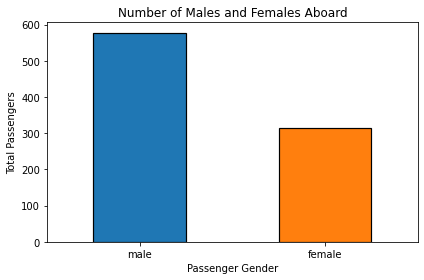

In [34]:
train['Sex'].value_counts().plot(kind='bar', rot=0, edgecolor='black', linewidth=1.2, color=['C0', 'C1'])
plt.title('Number of Males and Females Aboard')
plt.ylabel('Total Passengers')
plt.xlabel('Passenger Gender')
plt.tight_layout()
plt.show()

# Relationship between gender and survival  
From the charts below, we can see that the proportion of males who survived was much lower than the proportion of women that survived. Female passengers were significantly more likely to survive the event than not. Males, however, were very likely to have died. Gender alone seems to be a very strong indicator of whether or not a passenger was to survive the Titanic sinking.

In [35]:
counts = train.groupby('Sex').Survived.value_counts()
counts

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

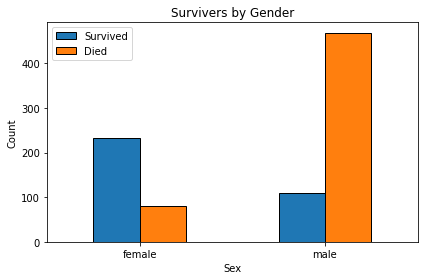

In [36]:
gender_survival = pd.DataFrame({'Sex': ['female', 'male'], 'Survived': [counts[0], counts[3]], 'Died': [counts[1], counts[2]]})
gender_survival.plot(x='Sex', kind='bar', rot=0, title='Survivers by Gender', ylabel='Count', edgecolor='black', linewidth=1)
plt.tight_layout()
plt.show()

**Bar chart**  
The bars above shows females were much more likely to survive than males, and that there were more total males aboard the ship.

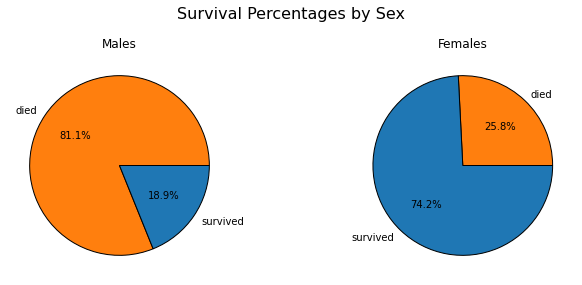

In [37]:
#create dataframes for pie chart
male = train[train['Sex']=='male'].groupby('Survived').count()['Sex']
female = train[train['Sex']=='female'].groupby('Survived').count()['Sex']

#create pie charts for men and women
pie_colors = ['tab:orange', 'tab:blue']
labels = ['died', 'survived']
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
fig.suptitle('Survival Percentages by Sex', fontsize=16)
axs[0].pie(x=male, autopct="%.1f%%", labels=['died', 'survived'], colors=pie_colors, wedgeprops={'edgecolor':'black', 'linewidth':1})
axs[0].set_title('Males')
axs[1].set_title('Females')
axs[1].pie(x=female, autopct="%.1f%%", labels=['died', 'survived'], colors=pie_colors, wedgeprops={'edgecolor':'black', 'linewidth':1})
plt.tight_layout()
plt.show()

**Pie Chart**  
Overall, females were much more likely to survive than males. In our next step, we'll examine if Age played a roll in the likelihood of males and females surviving.

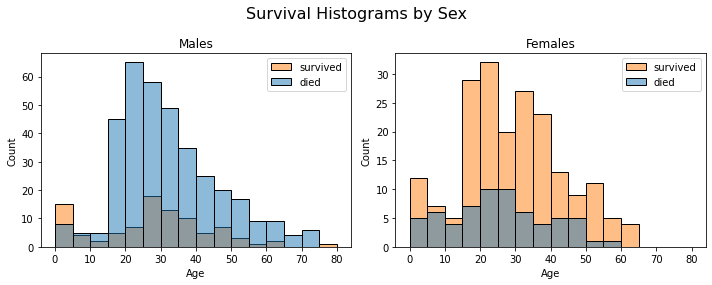

In [38]:
#plot Age on the x-axis and Count on the y-axis in a histogram using seaborn, color coded by Survival
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
fig.suptitle('Survival Histograms by Sex', fontsize=16)
ax1 = sns.histplot(data=train[train['Sex']=='male'], x='Age', hue='Survived', binwidth=5, binrange=(0,80), ax=axs[0])
ax2 = sns.histplot(data=train[train['Sex']=='female'], x='Age', hue='Survived', binwidth=5, binrange=(0,80), ax=axs[1])
ax1.set_title('Males')
ax2.set_title('Females')
for ax in [ax1, ax2]:
    ax.legend(labels=['survived', 'died'])
plt.tight_layout()
plt.show()

**Histogram**  
Males between the ages of 15 and 75 were unlikely to survive. Females in all age groups were more likely to survive than perish, but females between the ages of 5 and 15 had relatively higher mortality rates. Let's find out exactly what the rate was for young females.

In [39]:
young_females = train[(train['Sex']=='female') & (train['Age']>=5.0) & (train['Age']<=10.0)]
#df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]
young_females.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,460.857143,0.500000,2.714286,7.214286,1.714286,1.571429,25.833329
std,283.056900,0.518875,0.468807,1.847184,1.637473,0.646206,6.690594
min,25.000000,0.000000,2.000000,5.000000,0.000000,0.000000,12.475000
25%,235.000000,0.000000,2.250000,5.250000,0.000000,1.000000,21.843750
50%,492.500000,0.500000,3.000000,7.500000,1.500000,2.000000,27.000000
75%,699.500000,1.000000,3.000000,9.000000,3.000000,2.000000,31.275000
max,853.000000,1.000000,3.000000,10.000000,4.000000,2.000000,34.375000


In [40]:
young_males = train[(train['Sex']=='male') & (train['Age']>=5.0) & (train['Age']<=10.0)]
#df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]
young_males.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,456.000000,0.400000,2.900000,8.200000,2.600000,1.400000,28.977500
std,277.876071,0.516398,0.316228,1.229273,1.897367,0.516398,10.636116
min,51.000000,0.000000,2.000000,6.000000,0.000000,1.000000,12.475000
25%,207.000000,0.000000,3.000000,7.250000,1.000000,1.000000,22.368750
50%,485.500000,0.000000,3.000000,8.500000,3.500000,1.000000,29.125000
75%,701.500000,1.000000,3.000000,9.000000,4.000000,2.000000,35.409375
max,820.000000,1.000000,3.000000,10.000000,5.000000,2.000000,46.900000


**Youth Survival Rates**
Females between ages 5 and 10 inclusive had a 50 percent chance of survival.
Males in the same age group had a 40 percent chance of survival.

**Improve the data**  
To enhance the dataset, we'll fill in the NaN values for Age with random values within one standard deviation of the mean. Roughly 68% of the ages fall in this range. We have to do this for both the training data set and the test data set. In addition, we'll fill in the one NaN value for Fare in the test dataframe.  
  
Now the only columns with null values will be the Cabin and Embarked columns.

In [41]:
data = [train, test]
cols = ["Age", "Fare"]
for dataset in data:
    for col in cols:
        mean = train[col].mean()
        std = test[col].std()
        is_null = dataset[col].isnull().sum()
        # compute random numbers between the mean, std and is_null
        rand_col = np.random.randint(mean - std, mean + std, size = is_null)
        # fill NaN values in Age column with random values generated
        col_slice = dataset[col].copy()
        col_slice[np.isnan(col_slice)] = rand_col
        dataset[col] = col_slice

In [42]:
for dataset in data:
    dataset['sex_num'] = [1 if dataset['Sex'][i] == 'male' else 0 for i in range(len(dataset))]

In [43]:
#check to see if nulls were successfully filled in
for df in data:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  sex_num      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

In [44]:
#Quick way to separate out numeric and categorical variables
train_quant = train.select_dtypes(np.number)
train_quant.drop(['PassengerId'], axis=1, inplace=True)
train_cat = train.select_dtypes('object')
print(train_quant, train_cat)

     Survived  Pclass   Age  SibSp  Parch     Fare  sex_num
0           0       3  22.0      1      0   7.2500        1
1           1       1  38.0      1      0  71.2833        0
2           1       3  26.0      0      0   7.9250        0
3           1       1  35.0      1      0  53.1000        0
4           0       3  35.0      0      0   8.0500        1
..        ...     ...   ...    ...    ...      ...      ...
886         0       2  27.0      0      0  13.0000        1
887         1       1  19.0      0      0  30.0000        0
888         0       3  26.0      1      2  23.4500        0
889         1       1  26.0      0      0  30.0000        1
890         0       3  32.0      0      0   7.7500        1

[891 rows x 7 columns]                                                   Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  fe

In [45]:
train_quant.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_num
Survived,1.000000,-0.338481,-0.052392,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.338986,0.083081,0.018443,-0.549500,0.131900
Age,-0.052392,-0.338986,1.000000,-0.221971,-0.162010,0.107577,0.056764
SibSp,-0.035322,0.083081,-0.221971,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.162010,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.107577,0.159651,0.216225,1.000000,-0.182333
sex_num,-0.543351,0.131900,0.056764,-0.114631,-0.245489,-0.182333,1.000000


# Age distribution  
The histogram below indicates that the age variable follows a relatively normal distribution, with most passengers in in the 20-40 year range.

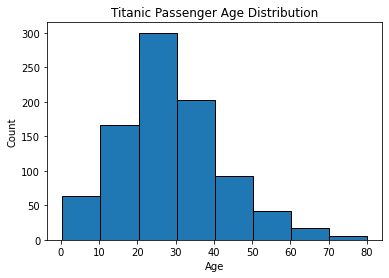

In [46]:
plt.hist(train.Age, bins=8, linewidth=1, edgecolor='black')
plt.title('Titanic Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Fares  
The Fares distribution is heavily right skewed, indicating a small number of passengers purchasing very expensive tickets. Using a log transformation, we can normalize this variable.

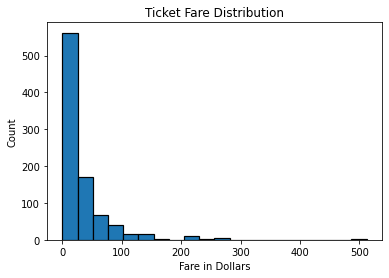

In [47]:
plt.hist(train.Fare, bins=20, linewidth=1.2, edgecolor='black')
plt.title("Ticket Fare Distribution")
plt.ylabel("Count")
plt.xlabel("Fare in Dollars")
plt.show()

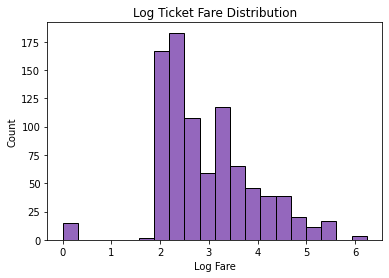

In [48]:
train['log_fare'] = np.log(train['Fare']+1)
test['log_fare'] = np.log(test['Fare']+1)
plt.hist(train.log_fare, bins=20, linewidth=1, edgecolor='black', color='C4')
plt.title("Log Ticket Fare Distribution")
plt.ylabel("Count")
plt.xlabel("Log Fare")
plt.show()

# Modeling  
Our first model will be a Random Forest Classifier, using the features we think have the greatest impact on survival.

In [49]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "log_fare", "Age"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved! This model was pretty accurate, with a score of over .77 =)")

Your submission was successfully saved! This model was pretty accurate, with a score of over .77 =)


In [50]:
model.score(X, y)

0.8395061728395061

# Adjust based on correlation matrix  
Let's see if by choosing the most strongly correlated features, we can improve our model without overfitting.

In [51]:
y = train["Survived"]

features = ["Pclass", "Sex", "log_fare", "Age"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission2.csv', index=False)
print("Your submission was successfully saved! This model was pretty accurate, with a score of over .77 =)")

Your submission was successfully saved! This model was pretty accurate, with a score of over .77 =)


In [52]:
model.score(X,y)

0.8507295173961841

In [53]:
X.head()

,Pclass,log_fare,Age,Sex_female,Sex_male
0,3,2.110213,22.0,0,1
1,1,4.280593,38.0,1,0
2,3,2.188856,26.0,1,0
3,1,3.990834,35.0,1,0
4,3,2.202765,35.0,0,1


In [54]:
#convert male and female to 1 and 0 for regression analysis
train['Sex_Numeric'] = [0 if train['Sex'][i]=='female' else 1 for i in range(len(train['Sex']))]
test['Sex_Numeric'] = [0 if test['Sex'][i]=='female' else 1 for i in range(len(test['Sex']))]

In [55]:
#import regression library
from sklearn.linear_model import LinearRegression

In [57]:
#try linear regressions to see how well Fare predicts Survival
X = np.array(train['log_fare']).reshape(-1, 1)
y = np.array(train['Survived']).reshape(-1, 1)
model = LinearRegression().fit(X, y)
print('R_squared:', round(model.score(X, y), 2))
print('intercept:', round(model.intercept_[0], 2))
print('slope:', round(model.coef_[0][0], 5))
#not very convincing. Sorry, rich folks!

R_squared: 0.11
intercept: -0.11
slope: 0.16564


In [58]:
#let's try Age
X = np.array(train['Age']).reshape(-1, 1)
y = np.array(train['Survived']).reshape(-1, 1)
model = LinearRegression().fit(X, y)
print('R_squared:', round(model.score(X, y), 2))
print('intercept:', round(model.intercept_[0], 2))
print('slope:', round(model.coef_[0][0], 5))
#also not very good! let's try multiple linear regression

R_squared: 0.0
intercept: 0.44
slope: -0.00189


In [62]:
features = ['Age', 'Fare', 'Pclass', 'Sex_Numeric']
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])
y = train['Survived']

model = LinearRegression().fit(X, y)

print('R_squared:', model.score(X, y))
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)
#getting better, but still not great! let's see how it did with predictions anyway

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_titanic_MLR.csv', index=False)
#This model is not nearly as accurate as the Random Forest Classifier

R_squared: 0.3830323055420428
intercept: 1.263351811035004
coefficients: [-4.73830628e-03  9.57119457e-05 -1.81968724e-01 -5.01737199e-01]
0.3830323055420428
